<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Tarea 3 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Abril 2017_

In [3]:
from PIL import Image
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ipywidgets import widgets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<div id='obj' />
# 1. Objetivos

<ul>
<li>Familiarizarse con la descomposición de valores singulares (SVD) como una herramienta para poder descomponer una matriz.</li>
<li>Observar como datos de alta dimensionalidad pueden ser representados en bajas dimensiones y así poder observar si existe algún patrón entre ellos. </li>
</ul>

<div id='obj' />
# 2. Hints

* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _ipywidgets_ https://github.com/ipython/ipywidgets
* _magic_ Use el siguiente magic: `%matplotlib inline`. http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
* _SVD_ https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

Hoy en día las bases de datos almacenan una gran cantidad de información, por lo que hacer una búsqueda en particular de algún archivo o dato en específico puede llegar a tener un gran costo computacional, por este motivo en este laboratorio vamos a estudiar una forma para buscar una imagen en una base de datos de imágenes, utilizando el algoritmo _SVD_ y nuestros conocimientos de algebra lineal.

Nuestra base de datos en este ejemplo serán imágenes de caras de 3 personas, por lo tanto, las imágenes de caras que pertenecen a la misma persona les asignaremos una etiqueta para luego poder identificarlas en nuestra matriz.

Lo primero que haremos será cargar nuestras imágenes en una matriz, abriremos cada una de ella y las convertiremos en vectores para luego almacenarlos en la matriz. En otras palabras, cada fila es una imagen y cada columna un píxel de la misma imagen.

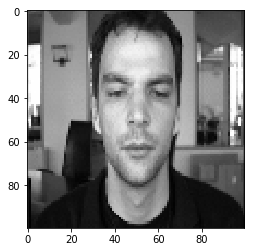

In [85]:
#Lo que hace esta función es limpiar la ruta de nuestros archivos, de esta manera asignarle un color dependiendo de la cara.
def clean_string(file):
    oldstr = file
    new_string = oldstr.replace("Ejemplo/", "")
    new_string = new_string.replace(".png","")
    new_string = new_string.replace("_0","")
    new_string = new_string.replace("_1","")
    new_string = new_string.replace("_2","")
    new_string = new_string.replace("_3","")
    new_string = new_string.replace("_4","")
    new_string = new_string.replace("_5","")
    new_string = new_string.replace("_6","")
    new_string = new_string.replace("_7","")
    new_string = new_string.replace("_8","")
    new_string = new_string.replace("_9","")
    if(new_string == "p1"):
        return('r')
    elif(new_string == "p2"):
        return('g')
    elif(new_string == "p3"):
        return('b')

#Acá lo que hacemos es cargar las imágenes a una lista llama image_list para luego convertir la lista en un array
image_list = []
label = []
for filename in glob.glob('Ejemplo/*.png'): 
    im=Image.open(filename)
    label.append(clean_string(filename))
    im = im.resize((100,100))
    imarray = np.array(im).reshape(-1)
    image_list.append(imarray)
image_list = np.asarray(image_list)

# Aquí se reconstruye la imagen desde un vector de largo 1e4 and una matriz de 100x100.
plt.figure()
plt.imshow(np.resize(image_list[0,:], (100,100)),cmap ="gray")
plt.show()

Como podemos ver, la imagen fue reducida a una resolución de 100x100 para que nuestro estudio pueda realizarse en un tiempo razonable.

Ahora para poder usar la SVD es necesario que se centren los datos, esto quiere decir que la media de nuestra matriz de datos debe ser $\mathbf{0}$.

In [86]:
#Calculamos la media de cada columna de la matriz de datos, para luego restar estas medias a cada columna de nuestra matriz. 
#Luego dividimos la matriz completa por 255 para que la magnitud de nuestros datos estén entre [0,1].

mean = image_list.mean(axis=0)
data = image_list - mean[None,:]
data = data / 255

Lo que vamos a hacer a continuación es utilizar un algoritmo llamado _PCA_ que nos ayudará a representar la data en una dimensión más baja

In [87]:
#Acá le pedimos a la función PCA que proyecte nuestros data a un espacio de 3 dimensiones.
pca = PCA(n_components=3)
transformed_dataset=pca.fit_transform(data)
print(transformed_dataset)

[[  1.89669282e+01  -1.78094656e+00   8.33532643e-01]
 [  1.99821803e+01  -2.60331196e+00   1.48382535e+00]
 [  1.86276608e+01  -2.47755655e+00   7.37763643e-01]
 [  1.90092098e+01  -1.72974705e+00   3.51178332e-01]
 [  1.68342747e+01   1.67000451e+00   3.41469781e-03]
 [  1.67780688e+01   1.47610130e+00   2.87585368e-01]
 [  1.65932680e+01   6.27514724e-01   1.07381867e-01]
 [  1.58722077e+01   2.62431373e+00  -8.95515926e-01]
 [  1.64966879e+01   2.21647047e+00  -4.56831181e-01]
 [  1.65794102e+01   7.47370989e-01   3.51649143e-02]
 [ -9.22069237e+00  -7.12088737e+00  -2.23288067e-01]
 [ -9.02181548e+00  -6.50642519e+00  -1.06157479e+00]
 [ -7.75844228e+00  -6.50631204e+00   5.65545270e-01]
 [ -9.69460485e+00  -8.09629969e+00   3.94378694e-01]
 [ -8.62900610e+00  -7.86445445e+00   1.33041620e+00]
 [ -8.75765546e+00  -8.14852246e+00   1.50715502e+00]
 [ -8.92610737e+00  -8.28204614e+00   1.15026473e+00]
 [ -9.29234333e+00  -7.90321789e+00   5.69299252e-01]
 [ -8.95383584e+00  -6.45844

Ahora que hemos proyectado nuestra data a 3 dimensiones podemos usar un gráfico para ver cómo se comportan los datos, además podremos visualizar como a medida que nos vamos moviendo por este espacio podemos ir obteniendo distintas combinaciones de caras dependiendo en donde nos encontremos. Esto es más fácil verlo con un ejemplo.

In [88]:
def get_random_index(label,color,seed):
    np.random.seed(seed)
    while(True):
        index = np.random.randint(0,len(label)-1)
        if label[index] == color:
            return index
def parametrization(t,r,g,b,transformed_dataset):
    return(np.dot(transformed_dataset[r,:],(((t+2)*(t-2))/((2)*(-2)))) + np.dot(transformed_dataset[g,:],(((t)*(t-2))/((-2)*(-2-2)))) + np.dot(transformed_dataset[b,:],(((t)*(t+2))/((2)*(2+2)))))


In [89]:
#función para poder ver las proyecciones del dataset de prueba.
def visual(dataset,label,t=0,components=3):
    points = np.arange(-2,2,0.1)
    pca = PCA(n_components=components)
    transformed_dataset=pca.fit_transform(dataset)
    red = get_random_index(label,"r",100)
    green = get_random_index(label,"g",100)
    blue = get_random_index(label,"b",100)
    vector = parametrization(t,red,green,blue,transformed_dataset)
    curve = np.asarray([parametrization(k,red,green,blue,transformed_dataset) for k in points]) 
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(2,2,1,projection = '3d')
    ax.set_title('Proyección 3D')
    ax.set_xlabel('Vector 1')
    ax.set_ylabel('Vector 2')
    ax.set_zlabel('Vector 3')
    if(components > 2):
        z=transformed_dataset[:,2]
        x=transformed_dataset[:,0]
        y=transformed_dataset[:,1]
        ax.scatter(vector[0],vector[1],vector[2],c="black")
        ax.plot(curve[:,0],curve[:,1],curve[:,2],color="gray")
        ax.scatter(x, y, z, c=label, edgecolors='none', linewidths=0)
    elif(components == 2):
        x=transformed_dataset[:,0]
        y=transformed_dataset[:,1]
        ax.scatter(vector[0],vector[1],0,c="black")
        ax.plot(curve[:,0],curve[:,1],np.zeros(len(curve[:,0])),color="gray")
        ax.scatter(x, y, np.zeros(len(y)), c=label, edgecolors='none', linewidths=0)
    elif(components == 1):
        x=transformed_dataset[:,0]
        ax.scatter(vector[0],0,0,c="black")
        ax.plot(curve[:,0],np.zeros(len(curve[:,0])),np.zeros(len(curve[:,0])),color="gray")
        ax.scatter(x, np.zeros(len(x)),np.zeros(len(x)) , c=label, edgecolors='none', linewidths=0)
    plt.hold(True)
    ax = fig.add_subplot(2,2,2)
    ax.set_title('Imagen reconstruida'+' con '+str(components)+' componentes y t='+str(t)) 
    ax.imshow(np.reshape((pca.inverse_transform(vector)*255 + mean[None,:]),(100,100)), cmap='gray')
    plt.show()

In [91]:
dp = 0.1
dx = 1
widgets.interact(visual, label = widgets.fixed(label),dataset=widgets.fixed(data),t=(-2,2,dp),components = (1,100,dx))

/usr/local/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


[[-0.20653595 -0.2130719  -0.17686275 ..., -0.26522876 -0.27594771
  -0.23620915]
 [-0.22614379 -0.20915033 -0.19647059 ..., -0.28091503 -0.27986928
  -0.15385621]
 [-0.2379085  -0.2248366  -0.20039216 ..., -0.27699346 -0.18183007
  -0.13424837]
 ..., 
 [ 0.0875817   0.09281046  0.06627451 ...,  0.1269281   0.11228758
   0.09320261]
 [ 0.09150327  0.10457516  0.08196078 ...,  0.14261438  0.11620915
   0.10104575]
 [ 0.09542484  0.09673203  0.07019608 ...,  0.11908497  0.12405229
   0.08535948]]


Cada punto que observamos en la figura anterior es una imagen representada en el espacio de tres dimensiones, el punto negro que podemos mover representa en donde nos encontramos en este espacio, por lo tanto, si visitamos cada uno de estos puntos de colores podemos visualizar una aproximación de la imagen que almacenamos, y si nos movemos dentro del espacio de caras podemos observar la imagen que representa esos puntos.

# Desarrollo

Para poder iniciar este laboratorio, se deben cargar las imágenes almacenadas en un _pickle_ (https://docs.python.org/2/library/pickle.html) adjunto, llamado _pickle 1_, una vez obtenida la matriz de imágenes con media 0 se deberán responder las siguientes preguntas. (Puede bajar la resolución de la imagen a 100x100, no se aceptará menos que eso.)

## Pregunta 1 (35 puntos)

Implementar el algoritmo PCA (Leer PDF adjunto) para proyectar los vectores de datos (imágenes en _pickle 1_) utilizando los 3 vectores asociados a los **valores singulares** que usted estime conveniente. ¿Por qué eligió esos vectores propios?

In [212]:
def my_pca(z, components):
    u, s, v = np.linalg.svd(z, full_matrices=False)
    return u[:,:components] * s[:components], v

def load_images(filepath):
    with open(filepath, "rb") as f:
        data = pickle.load(f)
        images = []
        for image in data:
            images.append(image.reshape(-1))
        data = np.asarray(images)
        return data

data = load_images("pickle1.pkl")
mean = data.mean(axis=0)
z = data - mean[None]
z /= 255

print(my_pca(z, 3))

(array([[ -1.85148919e+01,  -1.10808744e+01,  -5.15826216e+01],
       [  3.08045645e+01,   3.27599940e+01,  -1.28699445e+01],
       [  2.59377184e+01,   3.28392062e+01,  -1.31033762e+01],
       [  2.22126664e+01,   3.14995344e+01,  -9.22052807e+00],
       [  2.38208443e+01,   3.25521308e+01,  -9.35595099e+00],
       [  5.00876115e+01,   2.95692049e+01,  -5.19336708e+00],
       [  4.89567302e+01,   2.87991211e+01,  -5.57402854e+00],
       [  4.88569582e+01,   2.72647016e+01,  -7.71466409e+00],
       [  5.07588215e+01,   2.68553563e+01,  -3.41288622e+00],
       [  4.48922072e+01,  -1.42098493e+01,  -9.55549539e+00],
       [  4.43752802e+01,  -1.46688111e+01,  -7.58790535e+00],
       [  4.59267321e+01,  -1.38957757e+01,  -1.39255363e+01],
       [  4.53181607e+01,  -1.41085937e+01,  -1.22531415e+01],
       [  4.48553267e+01,  -1.45245308e+01,  -1.19381784e+01],
       [  4.48353109e+01,  -1.46057318e+01,  -1.11489244e+01],
       [  4.28280568e+01,  -1.36547728e+01,  -7.258243

## Pregunta 2 (25 puntos)

* (10 puntos) Utilizando las imágenes que están en el _pickle 2_, usted deberá encontrar los 5 vecinos más cercanos (esto quiere decir encontrar las 5 imágenes que estén a la menor norma **vectorial** euclidiana de nuestra imagen) para cada una de las imágenes utilizando los **vectores proyectados** obtenidos en la pregunta anterior. Usted deberá devolver los índices de las imágenes y las distancias ordenadas de menor a mayor, e ingresar estos números en la función que se encuentra a continuación. ¿Que puede decir acerca de los resultados? Concluya.

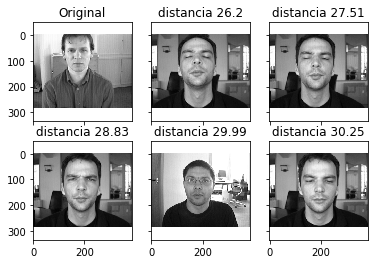

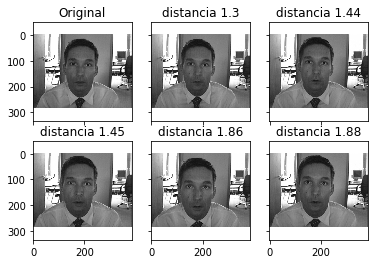

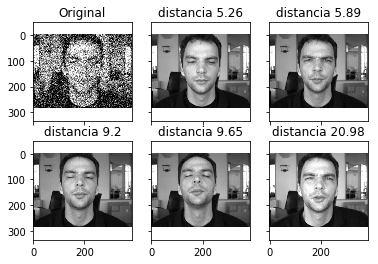

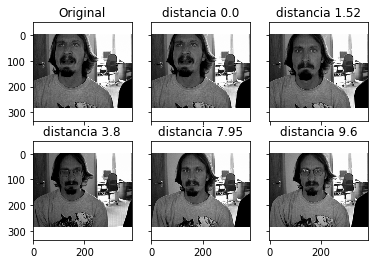

In [222]:
def show_image(dataset, indices, mean, original, distance, size=(100, 100)):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    ax1.imshow(np.reshape(original*255 + mean[None,:],size), cmap='gray')
    ax2.imshow(np.reshape(dataset[indices[0],]*255 + mean[None,:],size), cmap='gray')
    ax3.imshow(np.reshape(dataset[indices[1],]*255 + mean[None,:],size), cmap='gray')
    ax4.imshow(np.reshape(dataset[indices[2],]*255 + mean[None,:],size), cmap='gray')
    ax5.imshow(np.reshape(dataset[indices[3],]*255 + mean[None,:],size), cmap='gray')
    ax6.imshow(np.reshape(dataset[indices[4],]*255 + mean[None,:],size), cmap='gray')
    ax1.set_title('Original')
    ax2.set_title('distancia ' + str(distance[0]))
    ax3.set_title('distancia ' + str(distance[1]))
    ax4.set_title('distancia ' + str(distance[2]))
    ax5.set_title('distancia ' + str(distance[3]))
    ax6.set_title('distancia ' + str(distance[4]))
    plt.show()

# Ejemplo de índices. Los indices deben ser entregados en orden de menor a mayor distancia.
# Ejemplo de distancias.

# La función recibe la matriz de datos original, una lista de índices, la media de la matriz
# y la imagen original, todas vectorizadas.

imgs1 = load_images("pickle1.pkl")
imgs2 = load_images("pickle2.pkl")

images = np.vstack([imgs1, imgs2])
mean = images.mean(axis=0)
z = images - np.asarray(mean)
z /= 255
ts, vs = my_pca(z, 3)
pivots = ts[-len(imgs2):]
bases = ts[:len(imgs1)]

saved = []

for k, pivot in enumerate(pivots):
    diff = bases - pivot
    norms = []
    for i, d in enumerate(diff):
        norms.append((np.linalg.norm(d), i))
    norms.sort()
    most_like = np.asarray(norms[:5])
    distances = [round(f, 2) for f in most_like[:,0]]
    indices = [int(f) for f in most_like[:,1]]
    original = z[len(imgs1) + k]
    show_image(z, indices, mean, original, distances, (286, 384))

    saved.append(([k + len(imgs1)] + indices, distances))

* (10 puntos) Reconstruir utilizando su data proyectada las 5 imágenes más cercanas encontradas en el ejercicio anterior. ¿Qué puede decir sobre estas imágenes? Concluya.

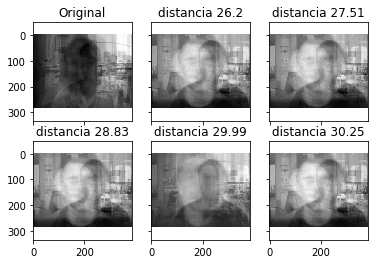

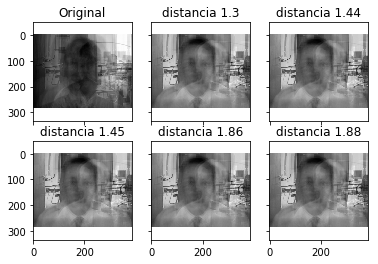

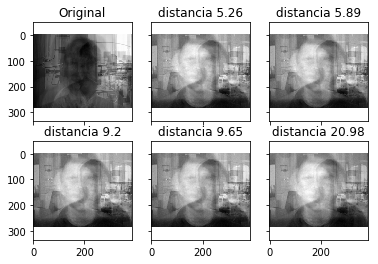

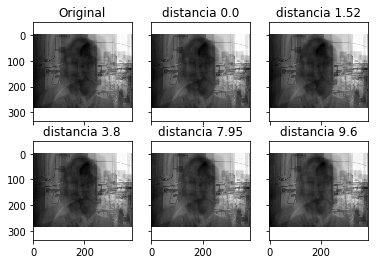

In [223]:
a = np.asarray(ts) @ np.asarray(vs[:3,:])

for i, dist in saved:
    original_index = i[0]
    likely_indices = i[1:]
    show_image(a, likely_indices, mean, a[len(imgs1) + k], dist, size=(286, 384))

## Pregunta 3 (10 puntos)

Volver a realizar el desarrollo de la pregunta 2 pero esta vez utilizando 10 vectores propios.

## Pregunta 4 (30 puntos)

Utilizando las imágenes reconstruidas de la pregunta 2 y 3, calcular la norma del error entre las imágenes originales y las reconstruidas, utilizando la norma 2. ¿Existe alguna relación entre la norma euclideana obtenida anteriormente con la norma matricial obtenida acá? ¿Afecta la cantidad de vectores **singulares** utilizados? Concluya usando sus gráficos.

# Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
 * El archivo de entrega debe denominarse Tarea2-rol.tar.gz(el nombre del ipynb tambien debe llevar ese nombre), y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.
* Si se aplica la SVD a matrices muy grande el tiempo de espera para ver algun resultado es muy alto, se recomienda correr el algoritmo y guardar el resultado en una variable.